In this doc, we'll be using GPy to do basic Gaussian Process Regression (GPR) on sample data. First import some packages.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import GPy as gpy

Now create sample data. GPy uses 2-dimensional arrays (so a 1-d NumPy array `v` needs to be embedded as a 2-d array of shape `(len(v), 1)`, which we will call a "column array" in the following). Note that `X` is generated as a column array, according to the requirements of GPy.

In [2]:
def create_sample_values(n, loc=0, scale=1, ndim=1):
    # Returns a (n, ndim)-shaped NumPy-array. The items are normally distributed according to scale, loc. 
    return stats.norm.rvs(loc=0, scale=1, size=(n,ndim))

# Create 100 points linearly spaced in the interval [0, 10]
X1 = np.linspace(0, 10, 100)[:, np.newaxis]

# Generate 1-d sample data
fX1 = create_sample_values(100)

Now, we generate the standard RBF kernel with our input dimension 1 (which must be the same as `X.shape[1]`, the length of the second dimension of `X`).

In [3]:
kern1 = gpy.kern.RBF(input_dim=1)

Now, generate our model using `X1`, `fX1`, `kern1`. Printing `model1` returns an overview of the parameters of `model1`.

In [4]:
model1 = gpy.models.gp_regression.GPRegression(X1, fX1, kern1)
print(model1)


Name : GP regression
Objective : 139.53020887507523
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


`model1.plot()` returns a plot which gives an idea of the generated model, and - in this case - completely defines the model.

{'dataplot': [<matplotlib.collections.PathCollection at 0x22a61a203d0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x22a61a30940>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x22a61a30b80>]}

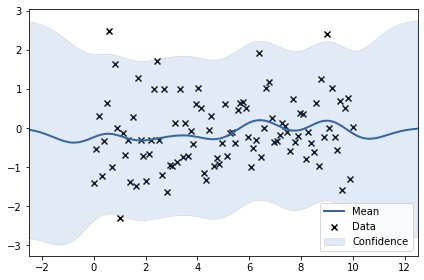

In [5]:
model1.plot()

This model can be used to predict distributions at arbitrary points in our coordinate space. We use the `predict_noiseless` method of `model1`, which returns two NumPy arrays: the first of shape `(n, input_dim+1)`, the second of shape `(n, 1)`, containing the points at which to predict along with predicted means, and predicted variances, respectively.

In [27]:
X1_predict = np.linspace(-1, 11, 10)[:, np.newaxis]
fX1_predict_mean, fX1_predict_var = model1.predict_noiseless(X_predict)

Consider what happens when we lower the Gaussian noise level the model assumes. We see that the distribution confidence interval becomes narrower.

{'dataplot': [<matplotlib.collections.PathCollection at 0x22a62b36d90>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x22a62b46250>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x22a62b46550>]}

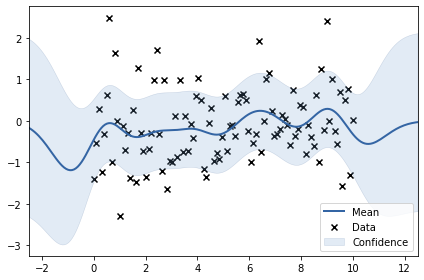

In [6]:
model1.Gaussian_noise.variance = 0.2
model1.plot()